In [187]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(42)
drive.mount('/content/gdrive/')
path = "/content/gdrive/MyDrive/Colab Notebooks/AI_ML/BTC_PREDICTION/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Multivariate Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample input data
X = np.array([[1, 2, 3], [2, 4, 6], [3, 6, 9], [4, 8, 12]])

# Sample output data
y = np.array([2, 4, 6, 8])

# Create a Linear Regression model object
model = LinearRegression()

# Fit the model to the input and output data
model.fit(X, y)

# Predict the output for a new set of inputs
new_input = np.array([[5, 10, 15]])
prediction = model.predict(new_input)

print("Prediction:", prediction)


Prediction: [10.]


In [188]:
import pandas as pd

df = pd.read_csv(path + 'BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [189]:
# converting string date to datetime and set as index
df.index = pd.to_datetime(df['Date'])
df.head()
# remove Date column
#df['Date'].pop

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


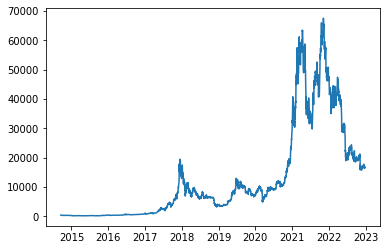

In [190]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [191]:
# data for predicting the close price based on the last 3 days
data = pd.DataFrame()
data['Target-3'] = df.Close.shift(3)
data['Target-2'] = df.Close.shift(2)
data['Target-1'] = df.Close.shift(1)
data['Target'] = df.Close
data.index = df.index
length = len(data.index) - 3
data = data.tail(length)
data
#scaler.fit_transform(np.array(data).reshape(-1,4))

,Target-3,Target-2,Target-1,Target
Date,,,,
2014-09-20,457.334015,424.440002,394.795990,408.903992
2014-09-21,424.440002,394.795990,408.903992,398.821014
2014-09-22,394.795990,408.903992,398.821014,402.152008
2014-09-23,408.903992,398.821014,402.152008,435.790985
2014-09-24,398.821014,402.152008,435.790985,423.204987
...,...,...,...,...
2022-12-24,16817.535156,16830.341797,16796.953125,16847.755859
2022-12-25,16830.341797,16796.953125,16847.755859,16841.986328
2022-12-26,16796.953125,16847.755859,16841.986328,16919.804688


In [192]:
import numpy as np

dates = data.index
matrix = data.to_numpy()
matrix

array([[  457.334015,   424.440002,   394.79599 ,   408.903992],
       [  424.440002,   394.79599 ,   408.903992,   398.821014],
       [  394.79599 ,   408.903992,   398.821014,   402.152008],
       ...,
       [16796.953125, 16847.755859, 16841.986328, 16919.804688],
       [16847.755859, 16841.986328, 16919.804688, 16717.173828],
       [16841.986328, 16919.804688, 16717.173828, 16617.025391]])

In [193]:
# independent variables
# [all rows, col 0 to one to last] 
ind_vars = matrix[:, 0:-1]
X = ind_vars.reshape(len(dates), ind_vars.shape[1]).astype(np.float32)

# dependent variable
# [all rows, last col]
y = matrix[:, -1].astype(np.float32)

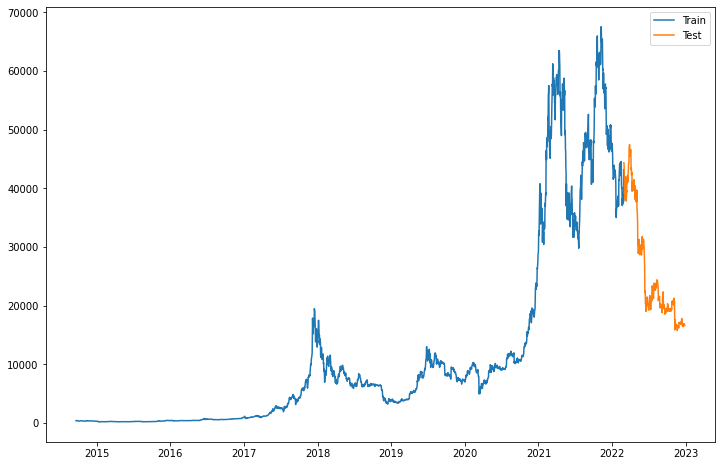

In [194]:
# 0-80% training interval
q_80 = int(len(dates) * 0.90)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_test, X_test, y_test = dates[q_80:], X[q_80:], y[q_80:]

plt.figure(figsize=(12,8))
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Test'])

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

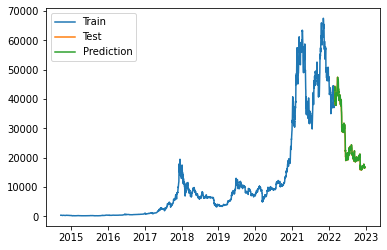

In [ ]:
prediction_v = model1.predict(X_test)

plt.plot(dates_train, y_train)
#plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.plot(dates_test, prediction_v)

plt.legend(['Train', 'Test', 'Prediction'])

In [ ]:
y_train

array([  408.904,   398.821,   402.152, ..., 39105.15 , 37709.785,
       43193.234], dtype=float32)

In [ ]:
model2 = LinearRegression()

# Fit the model to the input and output data
model2.fit(X_train, y_train)

LinearRegression()

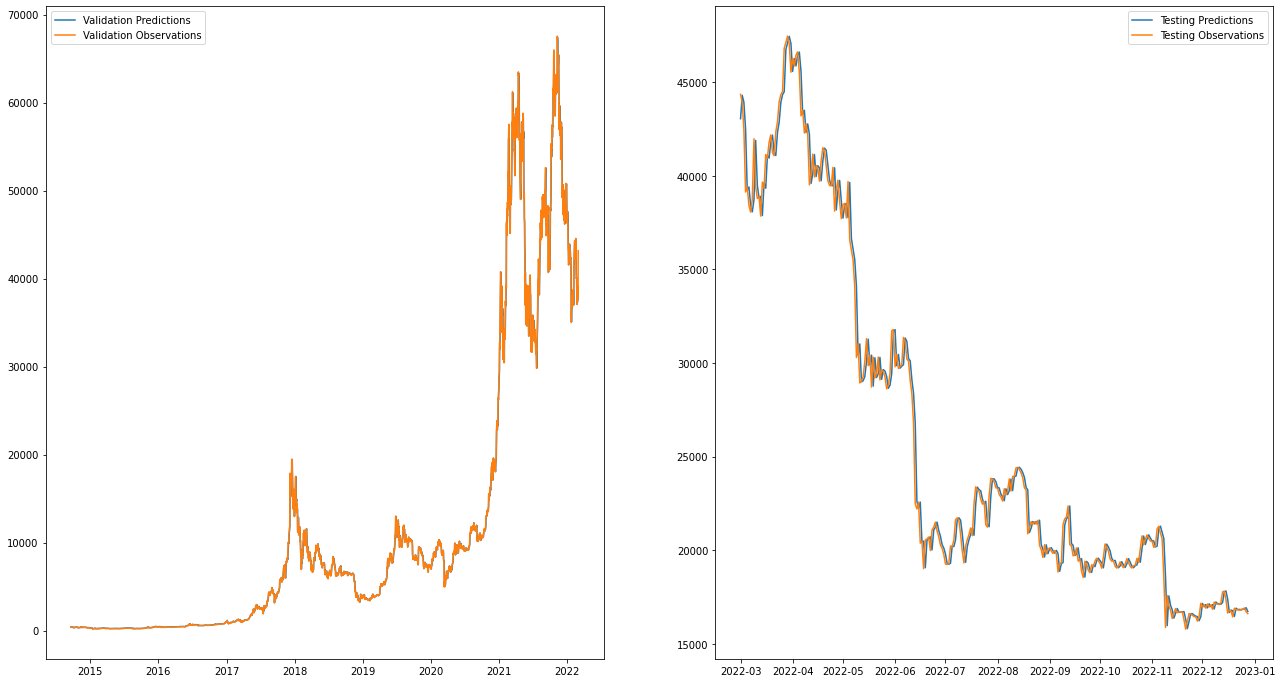

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(22,12))

train_predictions = model2.predict(X_train).flatten()
ax[0].plot(dates_train, train_predictions)
ax[0].plot(dates_train, y_train)
ax[0].legend(['Validation Predictions', 'Validation Observations'])

test_predictions = model2.predict(X_test).flatten()
ax[1].plot(dates_test, test_predictions)
ax[1].plot(dates_test, y_test)
ax[1].legend(['Testing Predictions', 'Testing Observations'])

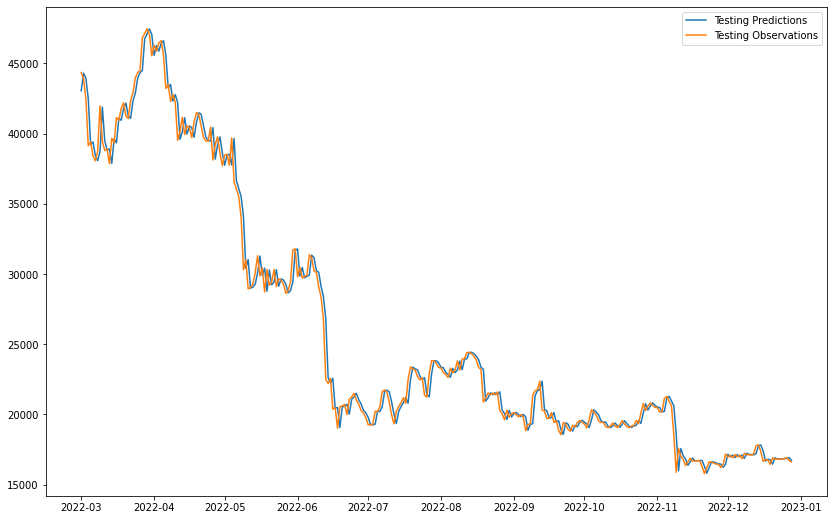

In [ ]:
plt.figure(figsize=(14,9))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
from sklearn.metrics import r2_score 

r2_score(y_test, test_predictions)

0.9902321245658788

In [ ]:
prediction_t = model2.predict(X_test)

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = dates_test #np.concatenate([dates_val, dates_test])
last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
  #print(last_window)
  next_prediction = model2.predict(np.array([last_window])).flatten()
  #print(next_prediction)
  recursive_predictions.append(next_prediction)
  last_window[0] = last_window[1]
  last_window[1] = last_window[2]
  last_window[2] = next_prediction

In [ ]:
#model.predict([X_val[-1]]).flatten()

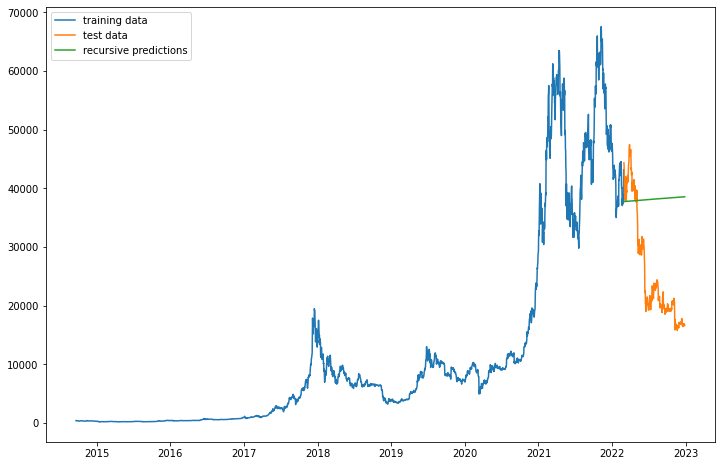

In [ ]:

plt.figure(figsize=(12, 8))
plt.plot(dates_train, y_train)

plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['training data', 
            'test data',
            'recursive predictions'
            ])

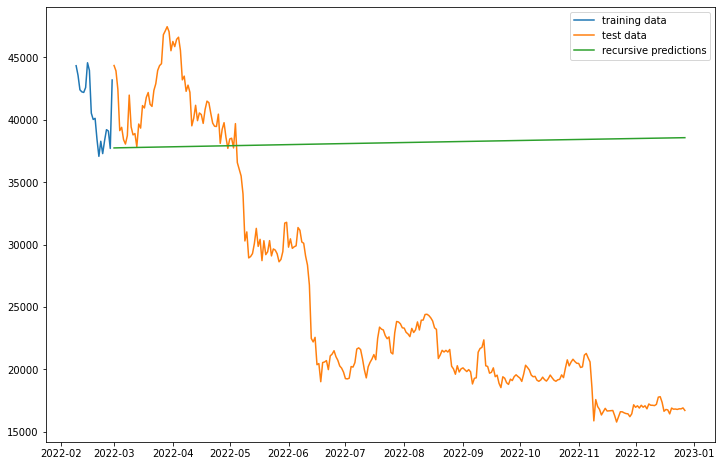

In [ ]:

plt.figure(figsize=(12, 8))
plt.plot(dates_train[-20:], y_train[-20:])

plt.plot(dates_test[:-1], y_test[:-1])
plt.plot(recursive_dates[:-1], recursive_predictions[:-1])
plt.legend(['training data', 
            'test data',
            'recursive predictions'
            ])

# LSTM Future Recursion (past 3 days)

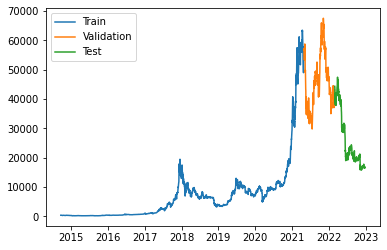

In [195]:
# 0-80% training interval
q_80 = int(len(dates) * 0.80)

# 80-90% validation interval
q_90 = int(len(dates) * 0.90)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [196]:
# cell to delete the current LSTM model and to avoid just adding more layers to it
# from tensorflow.keras.backend import clear_session
import tensorflow.keras as tf
model = tf.backend.clear_session()
model

In [ ]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.1),
              metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
'''

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras import layers\n\nmodel = Sequential([layers.Input((3, 1)),\n                    layers.LSTM(64),\n                    layers.Dense(32, activation='relu'),\n                    layers.Dense(32, activation='relu'),\n                    layers.Dense(1)])\n\nmodel.compile(loss='mse', \n              optimizer=Adam(learning_rate=0.1),\n              metrics=['mean_absolute_error'])\n\nhistory = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)\n"

Epoch 1/5
76/76 [==============================] - 2s 7ms/step - loss: 157030208.0000 - val_loss: 572486528.0000
Epoch 2/5
76/76 [==============================] - 0s 4ms/step - loss: 79283408.0000 - val_loss: 89160992.0000
Epoch 3/5
76/76 [==============================] - 0s 4ms/step - loss: 4342399.5000 - val_loss: 2048948.0000
Epoch 4/5
76/76 [==============================] - 0s 3ms/step - loss: 556235.4375 - val_loss: 1630483.3750
Epoch 5/5
76/76 [==============================] - 0s 3ms/step - loss: 554822.5000 - val_loss: 1709605.2500


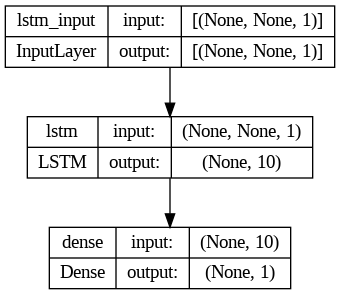

In [197]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM  

model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32,verbose=1)
plot_model(model, to_file='model.png', show_shapes=True)

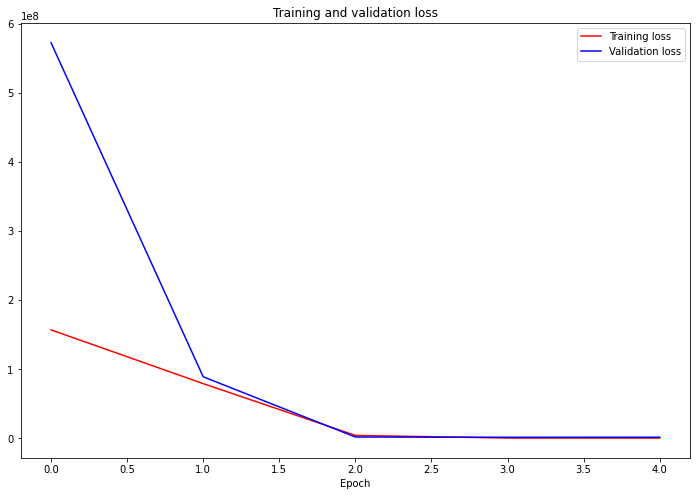

<Figure size 432x288 with 0 Axes>

In [198]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.figure()


plt.show()

76/76 [==============================] - 0s 5ms/step


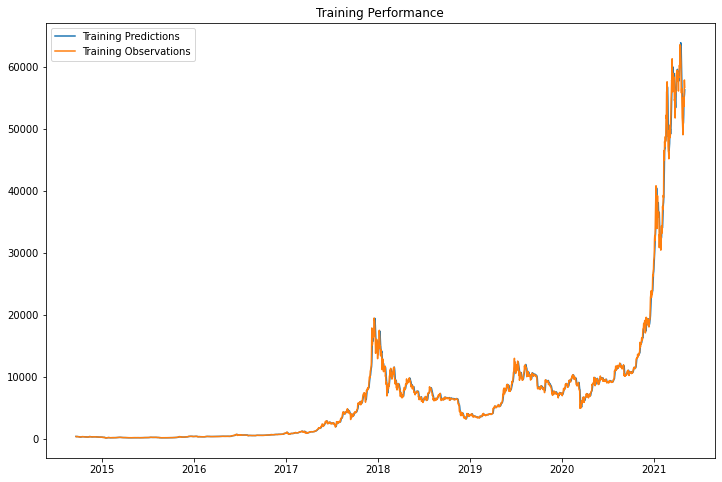

In [200]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(12,8))
plt.title('Training Performance')
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

10/10 [==============================] - 0s 4ms/step


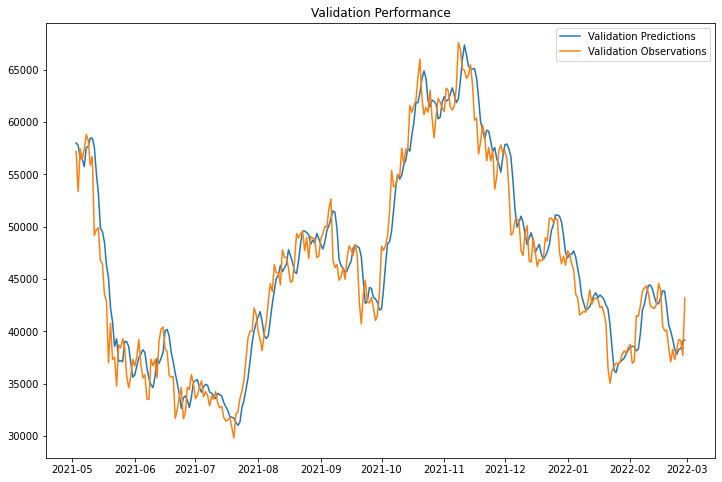

In [201]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(12,8))
plt.title('Validation Performance')
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

10/10 [==============================] - 0s 3ms/step


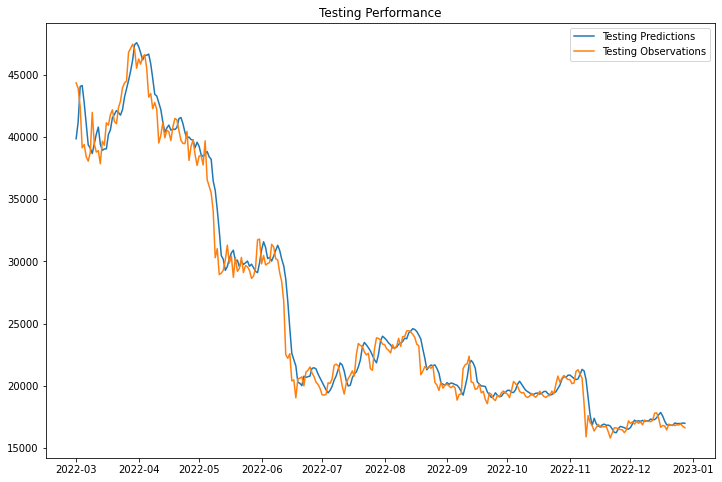

In [202]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(12,8))
plt.title('Testing Performance')
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [203]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, test_predictions[:])
mae = mean_absolute_error(y_test, test_predictions[:])
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print(mse, mae, rmse)

MSE:  1709605.2
MAE:  883.5223
RMSE:  1307.5188
1709605.2 883.5223 1307.5188


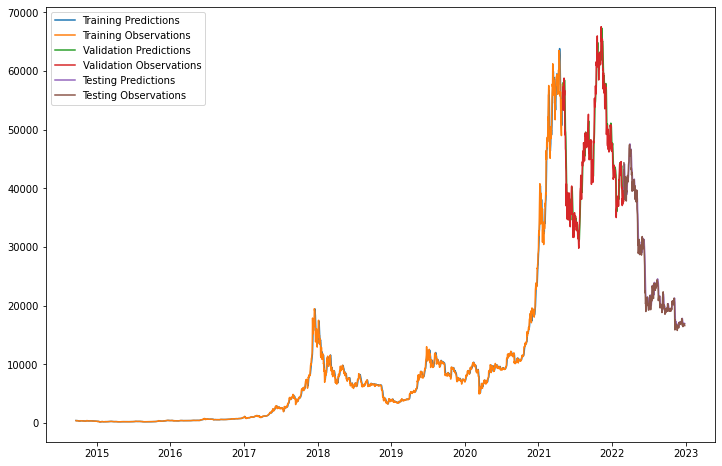

In [214]:
plt.figure(figsize=(12,8))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [215]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])
last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
 # print(last_window)
  next_prediction = model.predict(np.array([last_window]), verbose=0).flatten()
 # print(next_prediction)
  recursive_predictions.append(next_prediction)
  last_window[0] = last_window[1]
  last_window[1] = last_window[2]
  last_window[2] = next_prediction

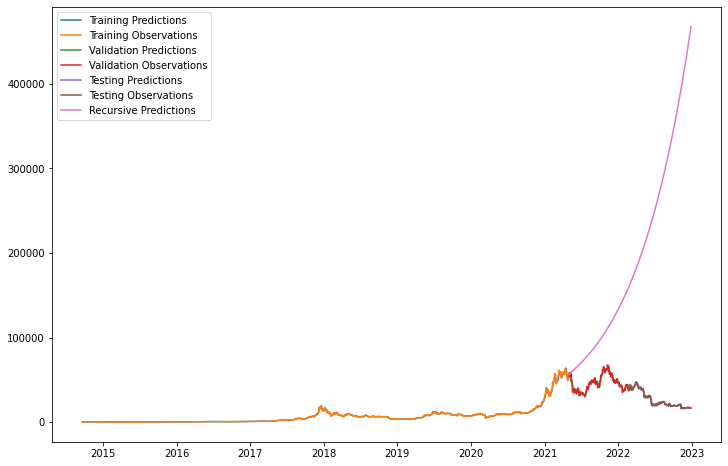

In [206]:
plt.figure(figsize=(12,8))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

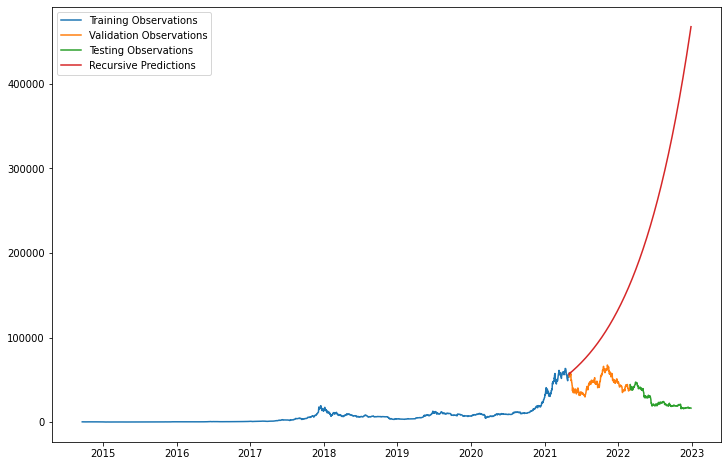

In [217]:
plt.figure(figsize=(12,8))
#plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
#plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
#plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Observations',
            'Validation Observations',
            'Testing Observations',
            'Recursive Predictions'])

## 30 Days

In [207]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.array(range(1,31)) 
last_window = deepcopy(X_test[-1])

for target_date in recursive_dates:
  next_prediction = model.predict(np.array([last_window]), verbose=0).flatten()
  recursive_predictions.append(next_prediction)
  last_window[0] = last_window[1]
  last_window[1] = last_window[2]
  last_window[2] = next_prediction

In [ ]:
dates_test[-1]

Timestamp('2022-12-28 00:00:00')

In [208]:
import datetime

start = datetime.datetime(2022, 12, 28)
end = datetime.datetime(2023, 1, 26)

delta = end - start

dates_predictions = pd.to_datetime([start + datetime.timedelta(days=i) for i in range(delta.days + 1)])

dates_predictions


DatetimeIndex(['2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31',
               '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26'],
              dtype='datetime64[ns]', freq=None)

Text(0.5, 1.0, '30 Days Recursive Prediction using LSTM')

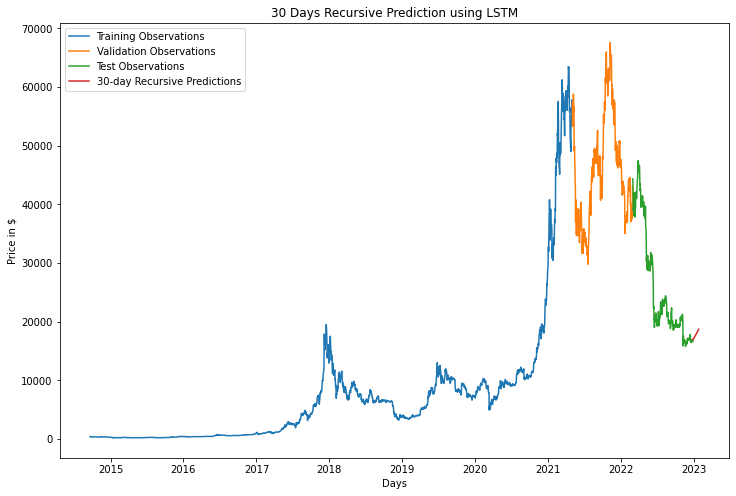

In [209]:
plt.figure(figsize=(12,8))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.plot(dates_predictions, recursive_predictions)
plt.legend(['Training Observations', 'Validation Observations', 'Test Observations', '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction using LSTM')

Text(0.5, 1.0, '30 Days Recursive Prediction')

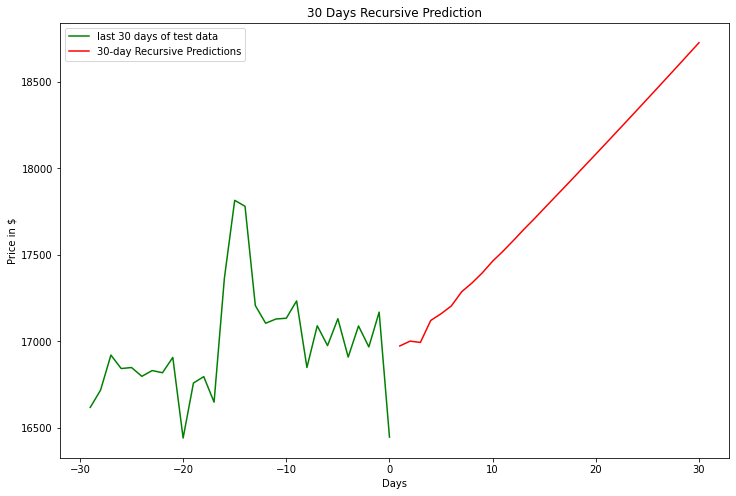

In [210]:
plt.figure(figsize=(12,8))
plt.plot(range(0, -30, -1), y_test[-30:], color='g')
plt.plot(recursive_dates, recursive_predictions, color='r')
plt.legend(['last 30 days of test data', 
             '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction')


Text(0.5, 1.0, '30 Days Recursive Prediction using LSTM')

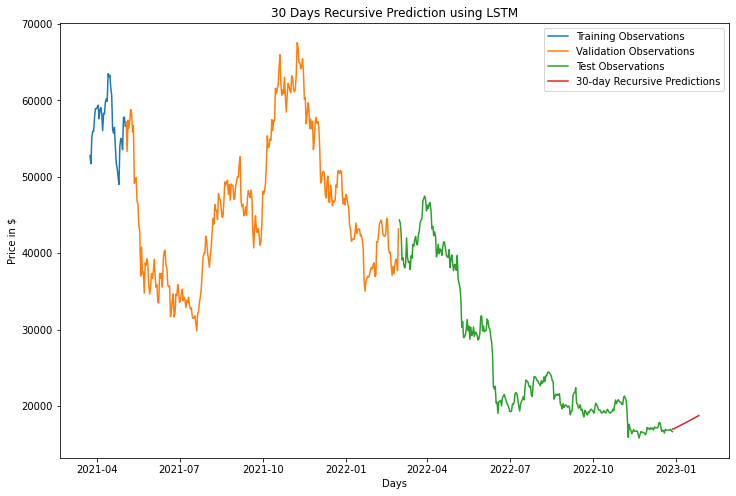

In [211]:
plt.figure(figsize=(12,8))
plt.plot(dates_train[-40:], y_train[-40:])
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.plot(dates_predictions, recursive_predictions)
plt.legend(['Training Observations', 'Validation Observations', 'Test Observations', '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction using LSTM')

Text(0.5, 1.0, '30 Days Recursive Prediction')

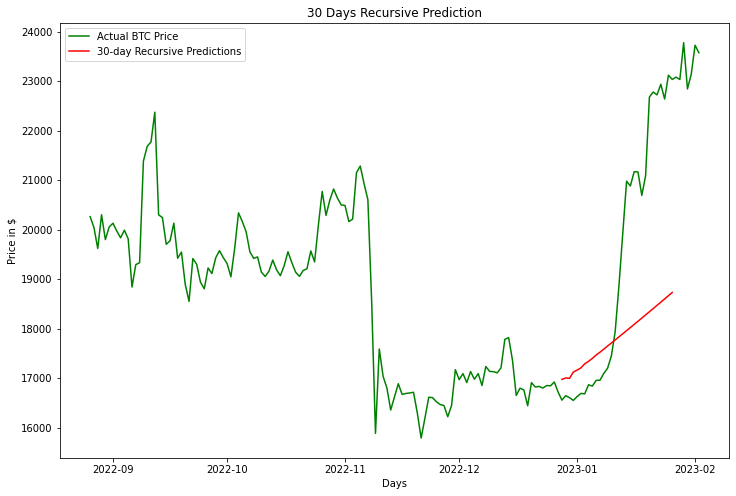

In [213]:
full_BTC = pd.read_csv(path + 'BTC-USD (1).csv')
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(full_BTC['Date'])[2900:], full_BTC['Close'][2900:], color='g')
plt.plot(dates_predictions, recursive_predictions, color='r')
plt.legend(['Actual BTC Price', '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction')

Text(0.5, 1.0, '30 Days Recursive Prediction')

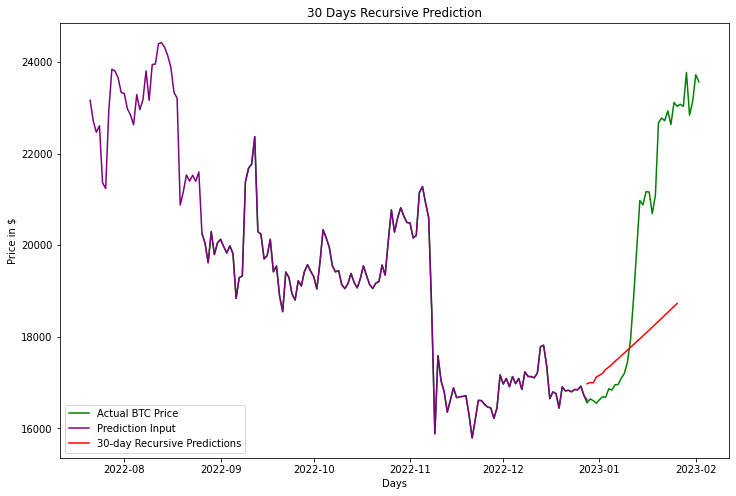

In [212]:
full_BTC = pd.read_csv(path + 'BTC-USD (1).csv')
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(full_BTC['Date'])[2900:], full_BTC['Close'][2900:], color='g')
plt.plot(dates_test[-161:], y_test[-161:], color='purple')
plt.plot(dates_predictions, recursive_predictions, color='r')
plt.legend(['Actual BTC Price', 'Prediction Input','30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction')

In [ ]:
full_BTC = pd.read_csv(path + 'BTC-USD (1).csv')
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(full_BTC['Date'])[2900:], full_BTC['Close'][2900:], color='g')
plt.plot(dates_test[-161:], y_test[-161:], color='purple')
plt.plot(dates_predictions, recursive_predictions, color='r')
plt.legend(['Actual BTC Price', 'Prediction Input','30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction')

In [142]:
l = len(y_test)+len(y_val)+len(y_train)
comp = full_BTC['Close'][l:]
diff = len(comp)-len(recursive_predictions)
diff
len(full_BTC['Close'][l+2:])-len(recursive_predictions)

13

Text(0.5, 1.0, '30 Days Recursive Prediction')

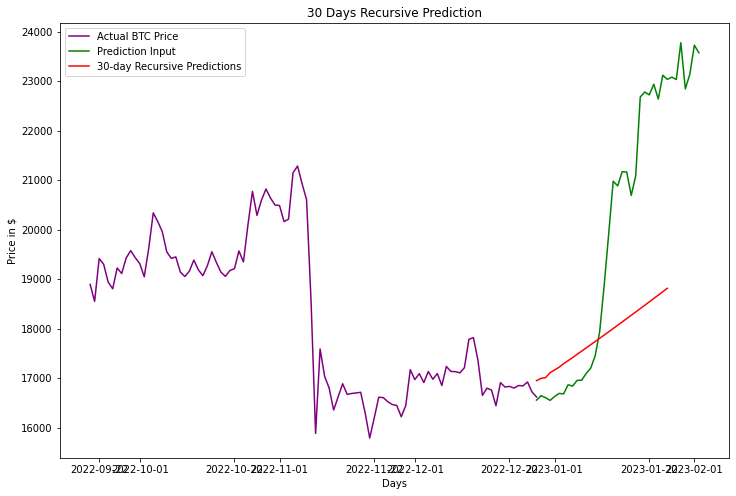

In [ ]:
full_BTC = pd.read_csv(path + 'BTC-USD (1).csv')
plt.figure(figsize=(12,8))
plt.plot(dates_test[-100:], y_test[-100:], color='purple')
plt.plot(pd.to_datetime(full_BTC['Date'])[l+2:], full_BTC['Close'][l+2:], color='g')
plt.plot(dates_predictions, recursive_predictions, color='r')
plt.legend(['Actual BTC Price', 'Prediction Input','30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(full_BTC['Close'][l+2:-7], recursive_predictions)
mae = mean_absolute_error(full_BTC['Close'][l+2:-7], recursive_predictions)
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)

#print(mse, mae, rmse)


MSE:  6077744.963790847
MAE:  1885.6897135375
RMSE:  2465.3082898069456
6077744.963790847 1885.6897135375 2465.3082898069456


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual_price = full_BTC['Close'][-len(recursive_predictions):]

print('MSE: %f' %mean_squared_error(actual_price, recursive_predictions))
print('MAE: %f' %mean_absolute_error(actual_price, recursive_predictions))

MSE: 10742984.414299
MAE: 2768.295117


## 60 Days

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.array(range(1,61)) 
last_window = deepcopy(X_test[-1])

for target_date in recursive_dates:
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[0] = last_window[1]
  last_window[1] = last_window[2]
  last_window[2] = next_prediction

1/1 [==============================] - 0s 43ms/step


In [ ]:
import datetime

start = datetime.datetime(2022, 12, 28)
end = datetime.datetime(2023, 2, 25)

delta = end - start

dates_predictions = pd.to_datetime([start + datetime.timedelta(days=i) for i in range(delta.days + 1)])

dates_predictions

DatetimeIndex(['2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31',
               '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
      

Text(0.5, 1.0, '60 Days Recursive Prediction using LSTM')

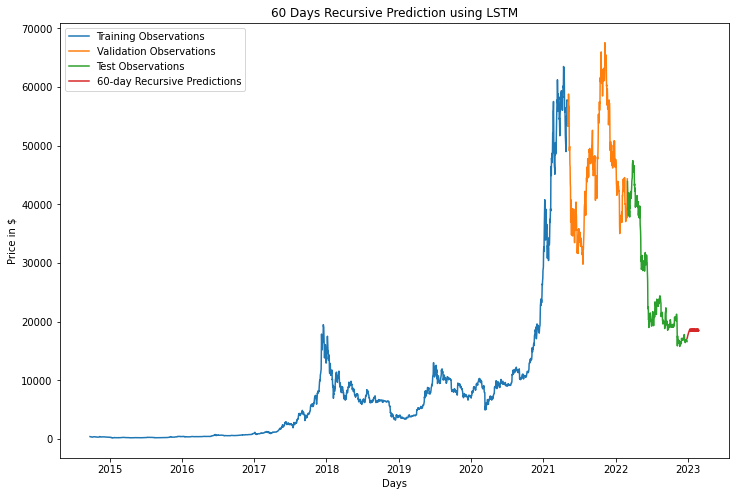

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.plot(dates_predictions, recursive_predictions)
plt.legend(['Training Observations', 'Validation Observations', 'Test Observations', '60-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('60 Days Recursive Prediction using LSTM')

Text(0.5, 1.0, '60 Days Recursive Prediction')

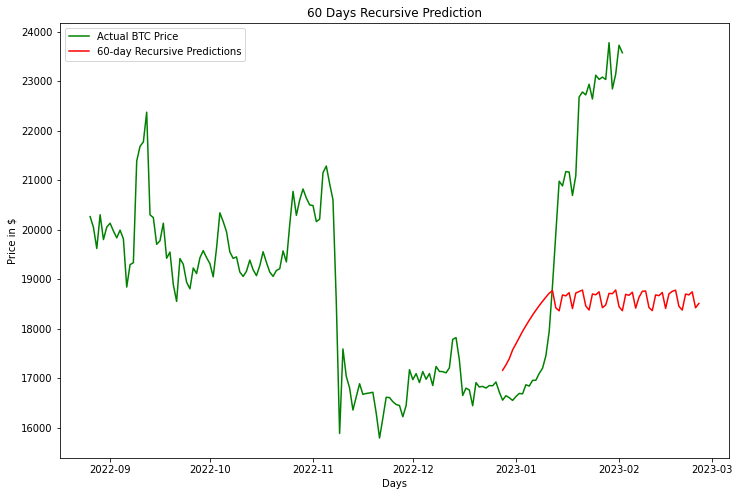

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(full_BTC['Date'])[2900:], full_BTC['Close'][2900:], color='g')
plt.plot(dates_predictions, recursive_predictions, color='r')
plt.legend(['Actual BTC Price', '60-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('60 Days Recursive Prediction')

## 100 Days

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.array(range(1,101)) 
last_window = deepcopy(X_test[-1])

for target_date in recursive_dates:
  next_prediction = model.predict(np.array([last_window]), verbose=0).flatten()
  recursive_predictions.append(next_prediction)
  last_window[0] = last_window[1]
  last_window[1] = last_window[2]
  last_window[2] = next_prediction

In [ ]:
import datetime

start = datetime.datetime(2022, 12, 28)
end = datetime.datetime(2023, 4, 6)

delta = end - start

dates_predictions = pd.to_datetime([start + datetime.timedelta(days=i) for i in range(delta.days + 1)])

dates_predictions

DatetimeIndex(['2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31',
               '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
      

Text(0.5, 1.0, '100 Days Recursive Prediction using LSTM')

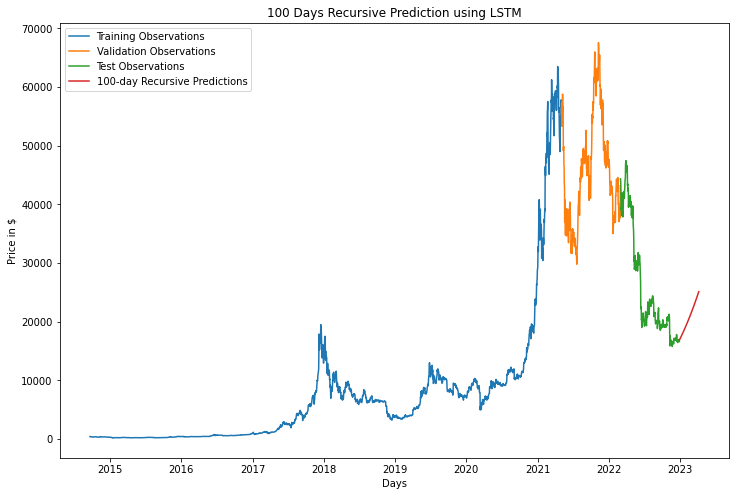

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.plot(dates_predictions, recursive_predictions)
plt.legend(['Training Observations', 'Validation Observations', 'Test Observations', '100-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('100 Days Recursive Prediction using LSTM')

Text(0.5, 1.0, '100 Days Recursive Prediction')

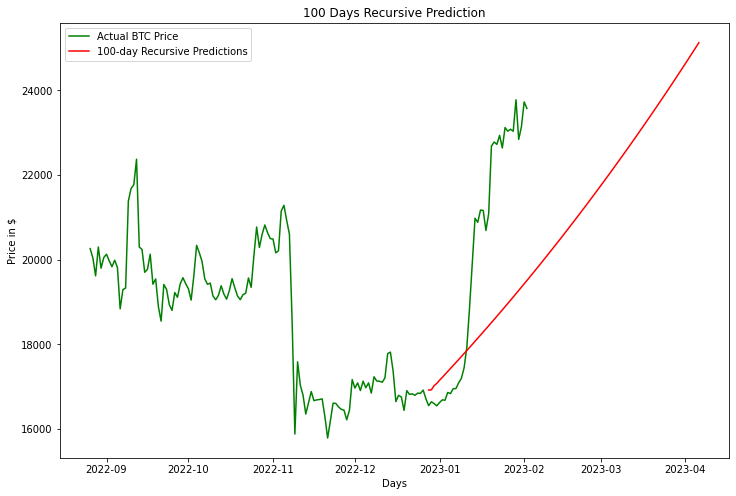

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(full_BTC['Date'])[2900:], full_BTC['Close'][2900:], color='g')
plt.plot(dates_predictions, recursive_predictions, color='r')
plt.legend(['Actual BTC Price', '100-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('100 Days Recursive Prediction')

# LSTM Future Recursion (past 7 days)


In [ ]:
df = pd.read_csv(path + 'BTC-USD.csv')
df.index = pd.to_datetime(df.pop('Date'))
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-12-24,16796.976563,16864.703125,16793.527344,16847.755859,16847.755859,9744636213
2022-12-25,16847.505859,16860.554688,16755.253906,16841.986328,16841.986328,11656379938
2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804


In [ ]:
# data for predicting the close price based on the last 7 days
data = pd.DataFrame()
data['Target-7'] = df.Close.shift(7)
data['Target-6'] = df.Close.shift(6)
data['Target-5'] = df.Close.shift(5)
data['Target-4'] = df.Close.shift(4)
data['Target-3'] = df.Close.shift(3)
data['Target-2'] = df.Close.shift(2)
data['Target-1'] = df.Close.shift(1)
data['Target'] = df.Close
data.index = df.index
length = len(data.index) - 7
data = data.tail(length)
data

,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
Date,,,,,,,,
2014-09-24,457.334015,424.440002,394.795990,408.903992,398.821014,402.152008,435.790985,423.204987
2014-09-25,424.440002,394.795990,408.903992,398.821014,402.152008,435.790985,423.204987,411.574005
2014-09-26,394.795990,408.903992,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988
2014-09-27,408.903992,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988,399.519989
2014-09-28,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988,399.519989,377.181000
...,...,...,...,...,...,...,...,...
2022-12-24,16795.091797,16757.976563,16439.679688,16906.304688,16817.535156,16830.341797,16796.953125,16847.755859
2022-12-25,16757.976563,16439.679688,16906.304688,16817.535156,16830.341797,16796.953125,16847.755859,16841.986328
2022-12-26,16439.679688,16906.304688,16817.535156,16830.341797,16796.953125,16847.755859,16841.986328,16919.804688


In [ ]:
import numpy as np

dates = data.index
matrix = data.to_numpy()
matrix

array([[  457.334015,   424.440002,   394.79599 , ...,   402.152008,
          435.790985,   423.204987],
       [  424.440002,   394.79599 ,   408.903992, ...,   435.790985,
          423.204987,   411.574005],
       [  394.79599 ,   408.903992,   398.821014, ...,   423.204987,
          411.574005,   404.424988],
       ...,
       [16439.679688, 16906.304688, 16817.535156, ..., 16847.755859,
        16841.986328, 16919.804688],
       [16906.304688, 16817.535156, 16830.341797, ..., 16841.986328,
        16919.804688, 16717.173828],
       [16817.535156, 16830.341797, 16796.953125, ..., 16919.804688,
        16717.173828, 16617.025391]])

In [ ]:
# independent variables
# [all rows, col 0 to one to last] 
ind_vars = matrix[:, 0:-1]
X = ind_vars.reshape(len(dates), ind_vars.shape[1]).astype(np.float32)

# dependent variable
# [all rows, last col]
y = matrix[:, -1].astype(np.float32)

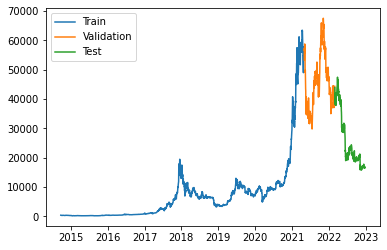

In [ ]:
# 0-80% training interval
q_80 = int(len(dates) * 0.80)

# 80-90% validation interval
q_90 = int(len(dates) * 0.90)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

Epoch 1/100
76/76 [==============================] - 2s 7ms/step - loss: 16798992.0000 - val_loss: 11811843.0000
Epoch 2/100
76/76 [==============================] - 0s 5ms/step - loss: 8310454.0000 - val_loss: 4182965.7500
Epoch 3/100
76/76 [==============================] - 0s 4ms/step - loss: 1513309.1250 - val_loss: 6544234.5000
Epoch 4/100
76/76 [==============================] - 0s 6ms/step - loss: 1931176.0000 - val_loss: 4770319.5000
Epoch 5/100
76/76 [==============================] - 0s 6ms/step - loss: 1263754.1250 - val_loss: 6247678.0000
Epoch 6/100
76/76 [==============================] - 0s 6ms/step - loss: 979616.5625 - val_loss: 2976395.7500
Epoch 7/100
76/76 [==============================] - 0s 5ms/step - loss: 897508.8750 - val_loss: 2766103.0000
Epoch 8/100
76/76 [==============================] - 0s 7ms/step - loss: 884383.0000 - val_loss: 2628304.7500
Epoch 9/100
76/76 [==============================] - 1s 7ms/step - loss: 900192.9375 - val_loss: 3149695.2500
Epo

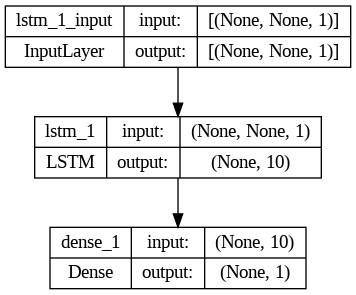

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM  

model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)
plot_model(model, to_file='model.png', show_shapes=True)

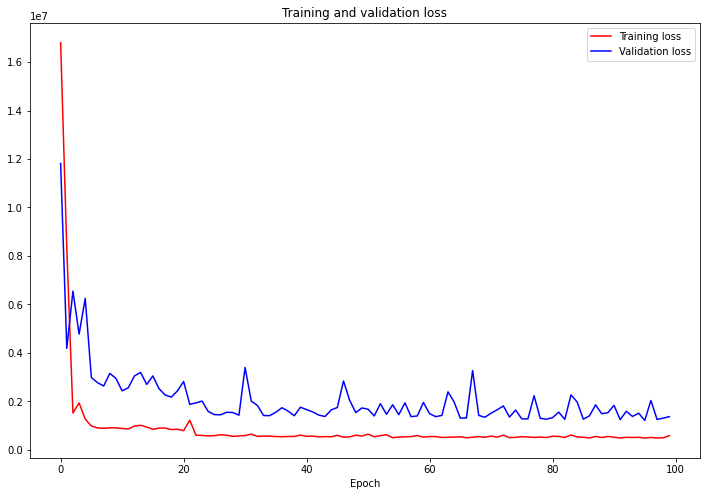

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.figure()


plt.show()

10/10 [==============================] - 0s 2ms/step


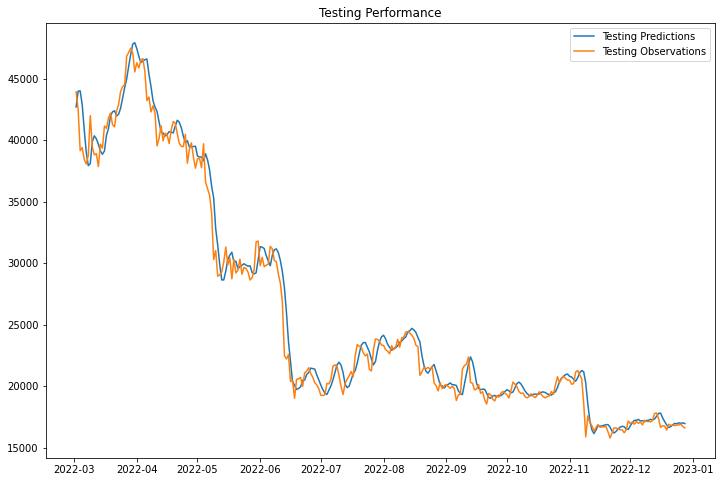

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(12,8))
plt.title('Testing Performance')
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, test_predictions[:])
mae = mean_absolute_error(y_test, test_predictions[:])
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
#print(mse, mae, rmse)

MSE:  1365692.5
MAE:  800.68536
RMSE:  1168.6284
1365692.5 800.68536 1168.6284


## 30 Days


In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.array(range(1,31)) 
last_window = deepcopy(X_test[-1])

for target_date in recursive_dates:
  next_prediction = model.predict(np.array([last_window]), verbose=0).flatten()
  recursive_predictions.append(next_prediction)
  last_window[0] = last_window[1]
  last_window[1] = last_window[2]
  last_window[2] = last_window[3]
  last_window[3] = last_window[4]  
  last_window[4] = last_window[5]
  last_window[5] = last_window[6]
  last_window[6] = next_prediction


In [ ]:
import datetime

start = datetime.datetime(2022, 12, 28)
end = datetime.datetime(2023, 1, 26)

delta = end - start

dates_predictions = pd.to_datetime([start + datetime.timedelta(days=i) for i in range(delta.days + 1)])

print(dates_predictions[1], len(recursive_predictions))
dates_train

2022-12-29 00:00:00 30


DatetimeIndex(['2014-09-24', '2014-09-25', '2014-09-26', '2014-09-27',
               '2014-09-28', '2014-09-29', '2014-09-30', '2014-10-01',
               '2014-10-02', '2014-10-03',
               ...
               '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03'],
              dtype='datetime64[ns]', name='Date', length=2414, freq=None)

Text(0.5, 1.0, '30 Days Recursive Prediction using LSTM')

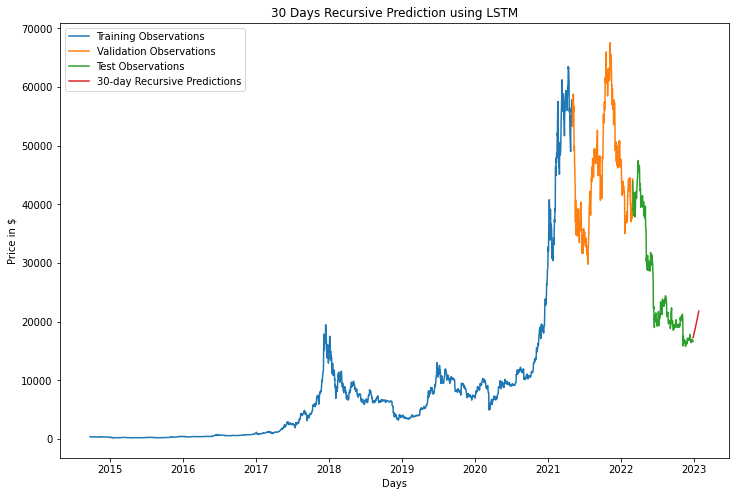

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.plot(dates_predictions, recursive_predictions)
plt.legend(['Training Observations', 'Validation Observations', 'Test Observations', '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction using LSTM')

Text(0.5, 1.0, '30 Days Recursive Prediction')

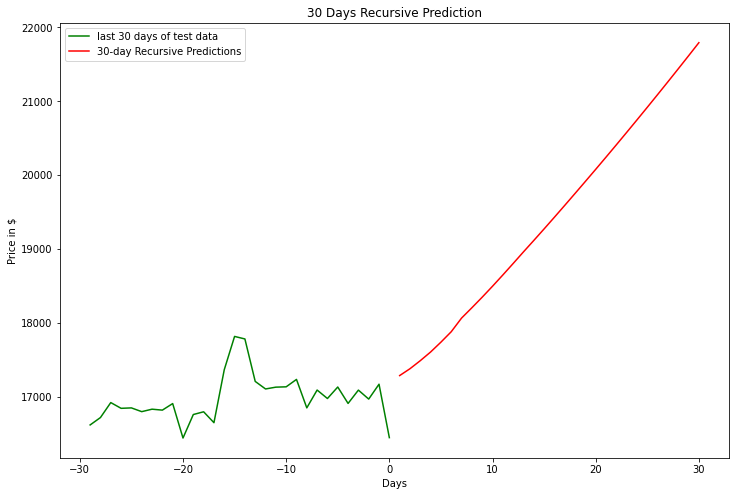

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(0, -30, -1), y_test[-30:], color='g')
plt.plot(recursive_dates, recursive_predictions, color='r')
plt.legend(['last 30 days of test data', 
             '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction')

Text(0.5, 1.0, '30 Days Recursive Prediction using LSTM')

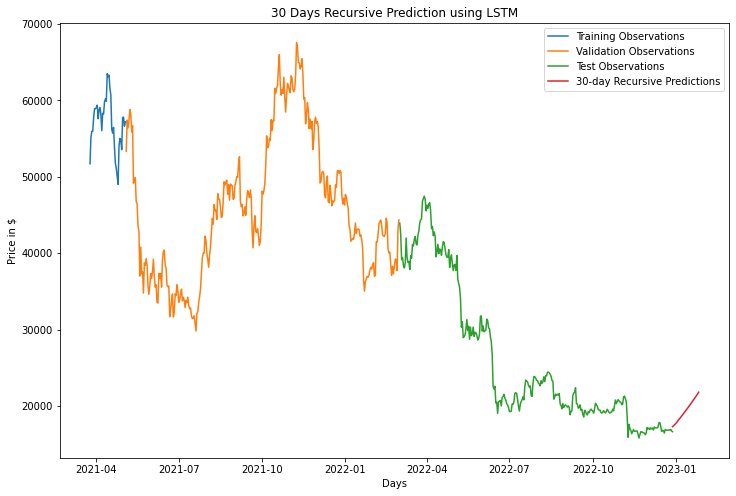

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(dates_train[-40:], y_train[-40:])
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.plot(dates_predictions, recursive_predictions)
plt.legend(['Training Observations', 'Validation Observations', 'Test Observations', '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction using LSTM')

Text(0.5, 1.0, '30 Days Recursive Prediction')

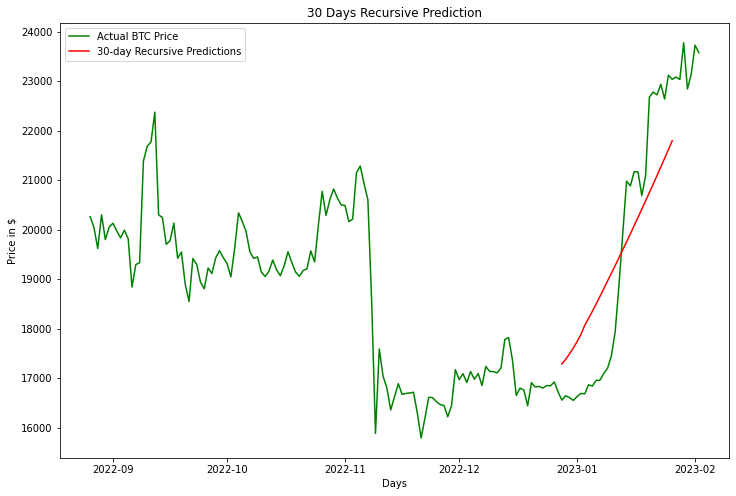

In [ ]:
full_BTC = pd.read_csv(path + 'BTC-USD (1).csv')
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(full_BTC['Date'])[2900:], full_BTC['Close'][2900:], color='g')
plt.plot(dates_predictions, recursive_predictions, color='r')
plt.legend(['Actual BTC Price', '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(full_BTC['Close'][l+2:-7], recursive_predictions)
mae = mean_absolute_error(full_BTC['Close'][l+2:-7], recursive_predictions)
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
#print(mse, mae, rmse)

MSE:  1685472.3832699799
MAE:  1218.7650390583333
RMSE:  1298.2574410608936
1685472.3832699799 1218.7650390583333 1298.2574410608936


## 60 Days

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.array(range(1,61)) 
last_window = deepcopy(X_test[-1])

for target_date in recursive_dates:
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[0] = last_window[1]
  last_window[1] = last_window[2]
  last_window[2] = last_window[3]
  last_window[3] = last_window[4]  
  last_window[4] = last_window[5]
  last_window[5] = last_window[6]
  last_window[6] = next_prediction

1/1 [==============================] - 0s 22ms/step


In [ ]:
import datetime

start = datetime.datetime(2022, 12, 28)
end = datetime.datetime(2023, 2, 25)

delta = end - start

dates_predictions = pd.to_datetime([start + datetime.timedelta(days=i) for i in range(delta.days + 1)])

dates_predictions

DatetimeIndex(['2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31',
               '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
      

Text(0.5, 1.0, '60 Days Recursive Prediction using LSTM')

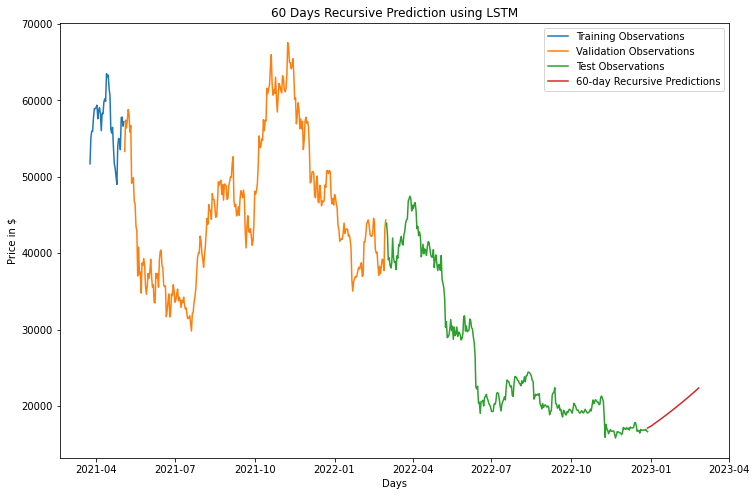

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(dates_train[-40:], y_train[-40:])
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.plot(dates_predictions, recursive_predictions)
plt.legend(['Training Observations', 'Validation Observations', 'Test Observations', '60-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('60 Days Recursive Prediction using LSTM')

Text(0.5, 1.0, '60 Days Recursive Prediction')

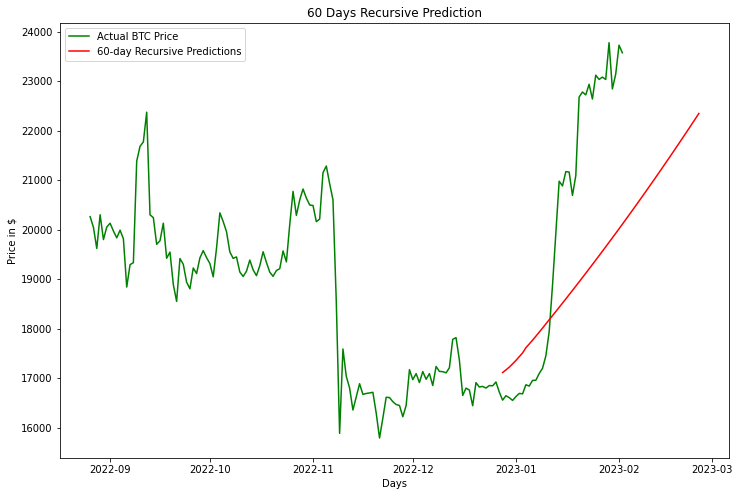

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(full_BTC['Date'])[2900:], full_BTC['Close'][2900:], color='g')
plt.plot(dates_predictions, recursive_predictions, color='r')
plt.legend(['Actual BTC Price', '60-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('60 Days Recursive Prediction')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual_price = full_BTC['Close'][-len(recursive_predictions):]

print('MSE: %f' %mean_squared_error(actual_price, recursive_predictions))
print('MAE: %f' %mean_absolute_error(actual_price, recursive_predictions))

MSE: 2834990.412270
MAE: 1417.436003


# New LSTM


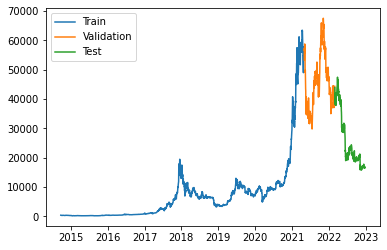

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = "/content/gdrive/MyDrive/Colab Notebooks/AI_ML/BTC_PREDICTION/"

df = pd.read_csv(path + 'BTC-USD.csv')
df.index = pd.to_datetime(df.pop('Date'))

data = pd.DataFrame()
data['Target-7'] = df.Close.shift(7)
data['Target-6'] = df.Close.shift(6)
data['Target-5'] = df.Close.shift(5)
data['Target-4'] = df.Close.shift(4)
data['Target-3'] = df.Close.shift(3)
data['Target-2'] = df.Close.shift(2)
data['Target-1'] = df.Close.shift(1)
data['Target'] = df.Close
data.index = df.index
length = len(data.index) - 7
data = data.tail(length)

dates = data.index
matrix = data.to_numpy()

ind_vars = matrix[:, 0:-1]
X = ind_vars.reshape(len(dates), ind_vars.shape[1]).astype(np.float32)
y = matrix[:, -1].astype(np.float32)

# 0-80% training interval
q_80 = int(len(dates) * 0.80)

# 80-90% validation interval
q_90 = int(len(dates) * 0.90)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
X_train.shape

(2414, 7)

In [ ]:
import numpy as np
import tensorflow as tf

# define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input((7,1)),
    tf.keras.layers.LSTM(units=50, return_sequences=True),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


# fit the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10,batch_size=7,verbose=1)


Epoch 1/10
345/345 [==============================] - 6s 11ms/step - loss: 170222464.0000 - val_loss: 747274752.0000
Epoch 2/10
345/345 [==============================] - 3s 8ms/step - loss: 170118672.0000 - val_loss: 746925760.0000
Epoch 3/10
345/345 [==============================] - 2s 7ms/step - loss: 170022880.0000 - val_loss: 746590080.0000
Epoch 4/10
345/345 [==============================] - 2s 7ms/step - loss: 169931440.0000 - val_loss: 746265792.0000
Epoch 5/10
345/345 [==============================] - 2s 6ms/step - loss: 169833904.0000 - val_loss: 745898496.0000
Epoch 6/10
345/345 [==============================] - 2s 7ms/step - loss: 169739056.0000 - val_loss: 745566592.0000
Epoch 7/10
345/345 [==============================] - 3s 9ms/step - loss: 169647696.0000 - val_loss: 745239296.0000
Epoch 8/10
345/345 [==============================] - 2s 7ms/step - loss: 169556672.0000 - val_loss: 744909568.0000
Epoch 9/10
345/345 [==============================] - 2s 7ms/step - los

In [ ]:
# up & down volatile prediction ... overall downward trend
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM  

model=Sequential()

model.add(LSTM(units=7,input_shape=(None, 1),activation="relu"))



model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1,batch_size=10,verbose=1)

242/242 [==============================] - 4s 9ms/step - loss: 168338688.0000 - val_loss: 659200704.0000


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7)                 252       
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


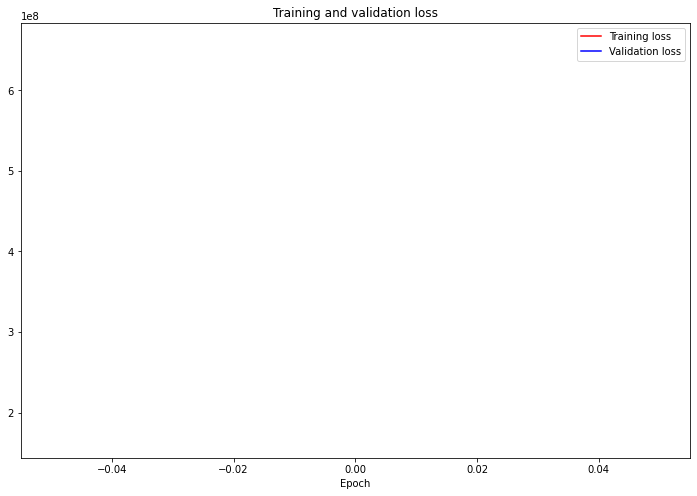

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.figure()


plt.show()

10/10 [==============================] - 0s 2ms/step


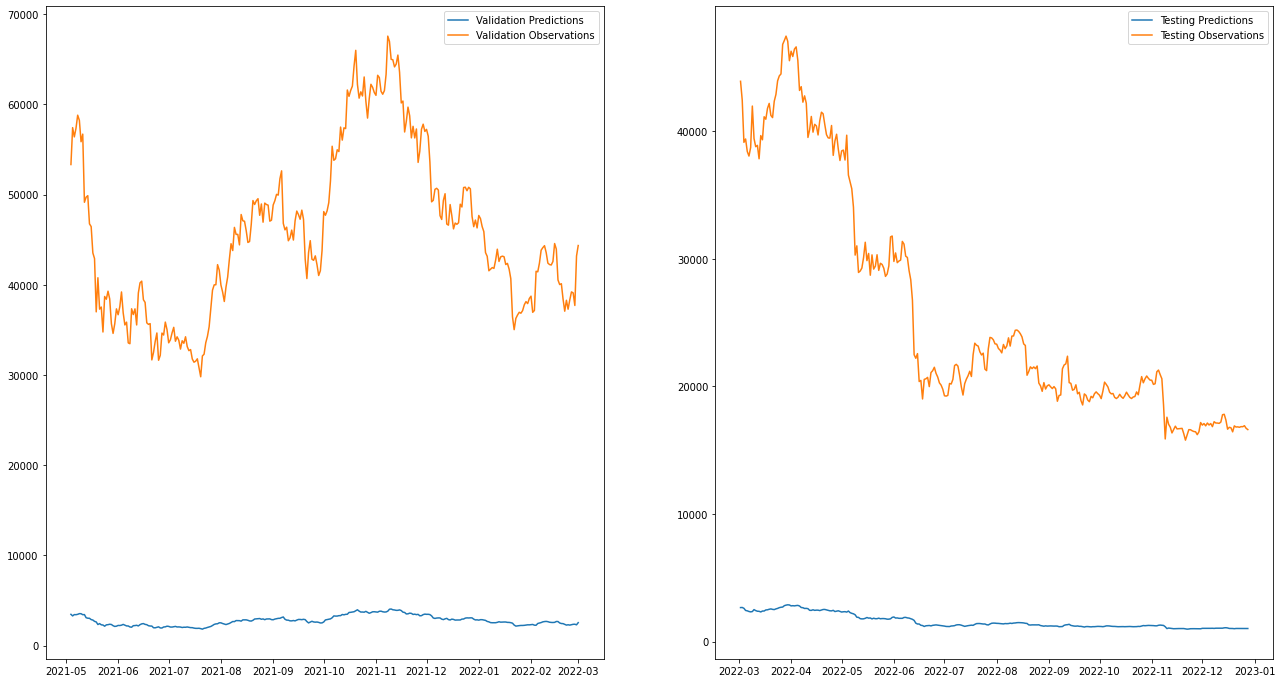

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(22,12))

val_predictions = model.predict(X_val).flatten()

'''plt.figure(figsize=(12,8))
plt.title('Validation Performance')
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])'''

#ax[0].figure(figsize=(12,8))
#ax[0].title('Validation Performance')
ax[0].plot(dates_val, val_predictions)
ax[0].plot(dates_val, y_val)
ax[0].legend(['Validation Predictions', 'Validation Observations'])

test_predictions = model.predict(X_test).flatten()

#ax[1].figure(figsize=(12,8))
#ax[1].title('Testing Performance')
ax[1].plot(dates_test, test_predictions)
ax[1].plot(dates_test, y_test)
ax[1].legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 659200768.0000


659200768.0

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.array(range(1,31)) 
last_window = deepcopy(X_test[-1])

for target_date in recursive_dates:
  next_prediction = model.predict(np.array([last_window]), verbose=0).flatten()
  recursive_predictions.append(next_prediction)
  last_window[0] = last_window[1]
  last_window[1] = last_window[2]
  last_window[2] = last_window[3]
  last_window[3] = last_window[4]  
  last_window[4] = last_window[5]
  last_window[5] = last_window[6]
  last_window[6] = next_prediction


In [ ]:
import datetime

start = datetime.datetime(2022, 12, 28)
end = datetime.datetime(2023, 1, 26)

delta = end - start

dates_predictions = pd.to_datetime([start + datetime.timedelta(days=i) for i in range(delta.days + 1)])

print(dates_predictions[1], len(recursive_predictions))
dates_train

2022-12-29 00:00:00 30


DatetimeIndex(['2014-09-24', '2014-09-25', '2014-09-26', '2014-09-27',
               '2014-09-28', '2014-09-29', '2014-09-30', '2014-10-01',
               '2014-10-02', '2014-10-03',
               ...
               '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03'],
              dtype='datetime64[ns]', name='Date', length=2414, freq=None)

Text(0.5, 1.0, '30 Days Recursive Prediction using LSTM')

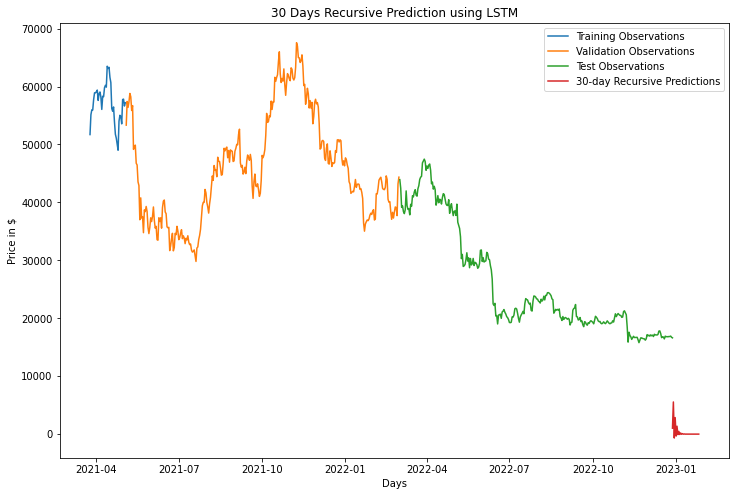

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(dates_train[-40:], y_train[-40:])
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.plot(dates_predictions, recursive_predictions)
plt.legend(['Training Observations', 'Validation Observations', 'Test Observations', '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction using LSTM')

Text(0.5, 1.0, '30 Days Recursive Prediction')

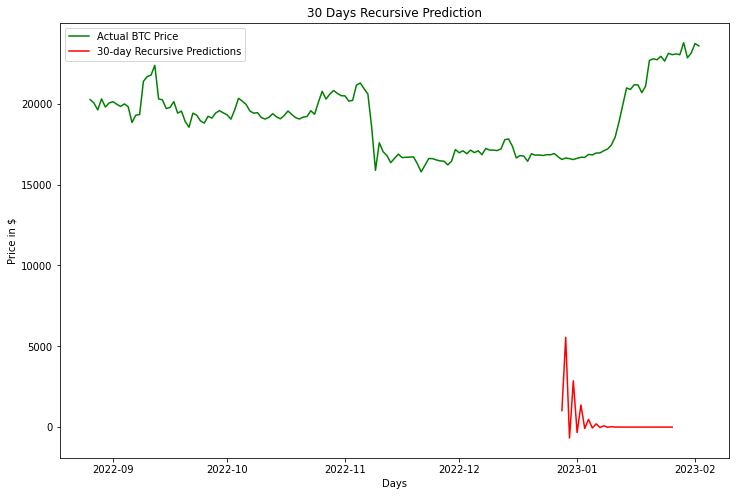

In [ ]:
full_BTC = pd.read_csv(path + 'BTC-USD (1).csv')
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(full_BTC['Date'])[2900:], full_BTC['Close'][2900:], color='g')
plt.plot(dates_predictions, recursive_predictions, color='r')
plt.legend(['Actual BTC Price', '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction')

# LSTM Windowing

In [ ]:
import pandas as pd

df = pd.read_csv(path + 'BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
l = len(df)
train_df, val_df, test_df = df[ : int(l*0.8)], df[int(l*0.8) : int(l*0.9)], df[int(l*0.9): ]

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Days')


  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
#w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
#                     label_columns=['T (degC)'])

#w1.plot()

# LSTM bitcoin price forecast

In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
import pandas as pd

df = pd.read_csv(path + 'BTC-USD.csv', index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df = df.Close
df=scaler.fit_transform(np.array(df).reshape(-1,1))


training_size=int(len(df)*0.60)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size],df[training_size:len(df)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1815, 1)
test_data:  (1210, 1)


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)

create_dataset(train_data)

(array([[[0.00414359]],
 
        [[0.00365546]],
 
        [[0.00321557]],
 
        ...,
 
        [[0.14215832]],
 
        [[0.15089554]],
 
        [[0.15500274]]]), array([[0.00365546],
        [0.00321557],
        [0.00342492],
        ...,
        [0.15089554],
        [0.15500274],
        [0.15457171]]))

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1799, 15, 1)
y_train:  (1799, 1)
X_test:  (1194, 15, 1)
y_test (1194, 1)


In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32,verbose=1)

Epoch 1/10
57/57 [==============================] - 2s 14ms/step - loss: 0.0030 - val_loss: 0.1422
Epoch 2/10
57/57 [==============================] - 1s 11ms/step - loss: 0.0015 - val_loss: 0.0702
Epoch 3/10
57/57 [==============================] - 1s 10ms/step - loss: 3.2907e-04 - val_loss: 0.0109
Epoch 4/10
57/57 [==============================] - 1s 10ms/step - loss: 8.5790e-05 - val_loss: 0.0078
Epoch 5/10
57/57 [==============================] - 1s 10ms/step - loss: 7.9134e-05 - val_loss: 0.0067
Epoch 6/10
57/57 [==============================] - 1s 10ms/step - loss: 7.6112e-05 - val_loss: 0.0062
Epoch 7/10
57/57 [==============================] - 1s 10ms/step - loss: 7.3568e-05 - val_loss: 0.0059
Epoch 8/10
57/57 [==============================] - 1s 10ms/step - loss: 7.3133e-05 - val_loss: 0.0057
Epoch 9/10
57/57 [==============================] - 1s 10ms/step - loss: 6.9729e-05 - val_loss: 0.0059
Epoch 10/10
57/57 [==============================] - 1s 10ms/step - loss: 7.3087e

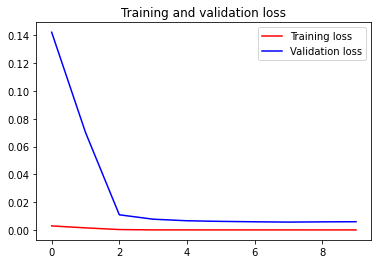

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

38/38 [==============================] - 0s 4ms/step


((1799, 1), (1194, 1))

In [ ]:
# For Evalution we will use these library

# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

#print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
#print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
#print("----------------------------------------------------------------------")
#print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
#print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data RMSE:  3895.585495329921
Train data MSE:  15175586.351424865
Train data MAE:  3249.943454395967
-------------------------------------------------------------------------------------
Test data RMSE:  32713.875584891764
Test data MSE:  1070197655.7837775
Test data MAE:  25927.123522265367
Train data explained variance regression score: -0.0005128142722319318
Test data explained variance regression score: -0.3168469237721596
Train data R2 score: -0.0005448898716056139
Test data R2 score: -2.541081677836184


In [ ]:
# shift train predictions for plotting
time_step = 15
look_back=time_step
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

'''
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()'''



Train predicted data:  (3025, 1)
Test predicted data:  (3025, 1)


"\nnames = cycle(['Original close price','Train predicted close price','Test predicted close price'])\n\n\nplotdf = pd.DataFrame({'date': close_stock['Date'],\n                       'original_close': close_stock['Close'],\n                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),\n                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})\n\nfig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],\n                                          plotdf['test_predicted_close']],\n              labels={'value':'Stock price','date': 'Date'})\nfig.update_layout(title_text='Comparision between original close price vs predicted close price',\n                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')\nfig.for_each_trace(lambda t:  t.update(name = next(names)))\n\nfig.update_xaxes(showgrid=False)\nfig.update_yaxes(showgrid=False)\nfig.show()"

# LSTM Future Recursion (past 7 days - future 7 days)

In [2]:
import pandas as pd

df = pd.read_csv(path + 'BTC-USD.csv')
df.index = pd.to_datetime(df.pop('Date'))
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-12-24,16796.976563,16864.703125,16793.527344,16847.755859,16847.755859,9744636213
2022-12-25,16847.505859,16860.554688,16755.253906,16841.986328,16841.986328,11656379938
2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804


In [3]:
data = pd.DataFrame()
data['Target-7'] = df.Close.shift(7)
data['Target-6'] = df.Close.shift(6)
data['Target-5'] = df.Close.shift(5)
data['Target-4'] = df.Close.shift(4)
data['Target-3'] = df.Close.shift(3)
data['Target-2'] = df.Close.shift(2)
data['Target-1'] = df.Close.shift(1)
data['Target'] = df.Close
data['Target+1'] = df.Close.shift(-1)
data['Target+2'] = df.Close.shift(-2)
data['Target+3'] = df.Close.shift(-3)
data['Target+4'] = df.Close.shift(-4)
data['Target+5'] = df.Close.shift(-5)
data['Target+6'] = df.Close.shift(-6)
#data['Target+7'] = df.Close.shift(-7)

data.index = df.index
length1 = len(data.index) - 7
data = data.tail(length1)
length2 = len(data.index) - 7
data = data.head(length2)
data

,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target,Target+1,Target+2,Target+3,Target+4,Target+5,Target+6
Date,,,,,,,,,,,,,,
2014-09-24,457.334015,424.440002,394.795990,408.903992,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988,399.519989,377.181000,375.467010,386.944000
2014-09-25,424.440002,394.795990,408.903992,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988,399.519989,377.181000,375.467010,386.944000,383.614990
2014-09-26,394.795990,408.903992,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988,399.519989,377.181000,375.467010,386.944000,383.614990,375.071991
2014-09-27,408.903992,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988,399.519989,377.181000,375.467010,386.944000,383.614990,375.071991,359.511993
2014-09-28,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988,399.519989,377.181000,375.467010,386.944000,383.614990,375.071991,359.511993,328.865997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-17,17128.724609,17104.193359,17206.437500,17781.318359,17815.650391,17364.865234,16647.484375,16795.091797,16757.976563,16439.679688,16906.304688,16817.535156,16830.341797,16796.953125
2022-12-18,17104.193359,17206.437500,17781.318359,17815.650391,17364.865234,16647.484375,16795.091797,16757.976563,16439.679688,16906.304688,16817.535156,16830.341797,16796.953125,16847.755859
2022-12-19,17206.437500,17781.318359,17815.650391,17364.865234,16647.484375,16795.091797,16757.976563,16439.679688,16906.304688,16817.535156,16830.341797,16796.953125,16847.755859,16841.986328


In [4]:
import numpy as np

dates = data.index
matrix = data.to_numpy()
matrix.shape

(3011, 14)

In [5]:
# predictor window
ind_vars = matrix[:, 0:7]
X = ind_vars.reshape(len(dates), ind_vars.shape[1], 1).astype(np.float32)

# true output window
y = matrix[:, -7:].reshape(len(dates), ind_vars.shape[1], 1).astype(np.float32)

In [6]:
print(X.shape, y.shape)

(3011, 7, 1) (3011, 7, 1)


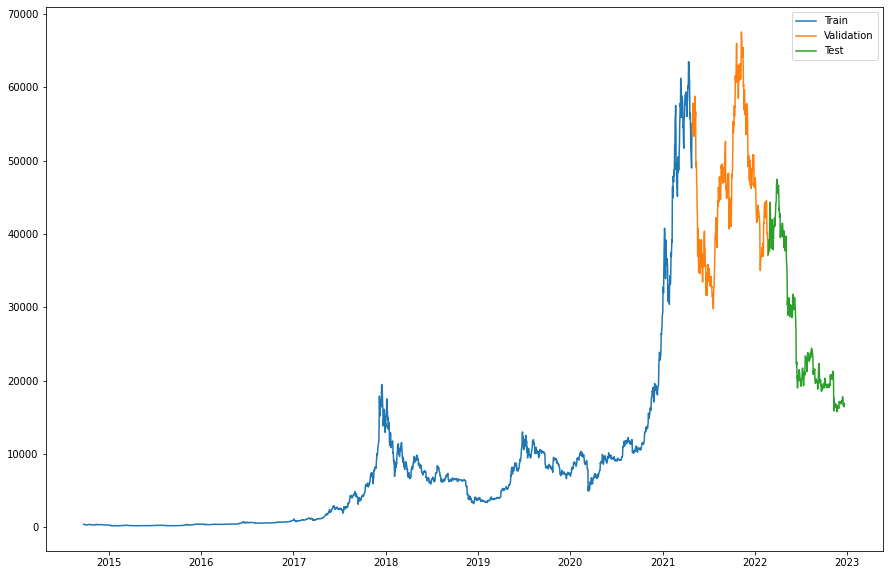

In [7]:
import matplotlib.pyplot as plt

# 0-80% training interval
q_80 = int(len(dates) * 0.80)

# 80-90% validation interval
q_90 = int(len(dates) * 0.90)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(15,10))
plt.plot(dates_train, [y[0] for y in y_train])
plt.plot(dates_val, [y[0] for y in y_val])
plt.plot(dates_test, [y[0] for y in y_test])

plt.legend(['Train', 'Validation', 'Test'])

Epoch 1/20
76/76 [==============================] - 4s 8ms/step - loss: 163246608.0000 - val_loss: 622498880.0000
Epoch 2/20
76/76 [==============================] - 0s 5ms/step - loss: 49124916.0000 - val_loss: 9171197.0000
Epoch 3/20
76/76 [==============================] - 0s 5ms/step - loss: 2441667.0000 - val_loss: 6576240.0000
Epoch 4/20
76/76 [==============================] - 0s 5ms/step - loss: 2353236.5000 - val_loss: 5851432.5000
Epoch 5/20
76/76 [==============================] - 0s 5ms/step - loss: 2167304.0000 - val_loss: 6582635.0000
Epoch 6/20
76/76 [==============================] - 0s 5ms/step - loss: 2405972.7500 - val_loss: 9169898.0000
Epoch 7/20
76/76 [==============================] - 0s 5ms/step - loss: 2117581.2500 - val_loss: 6847109.5000
Epoch 8/20
76/76 [==============================] - 0s 5ms/step - loss: 2792447.0000 - val_loss: 10973738.0000
Epoch 9/20
76/76 [==============================] - 0s 5ms/step - loss: 5991425.5000 - val_loss: 26899494.0000
Epo

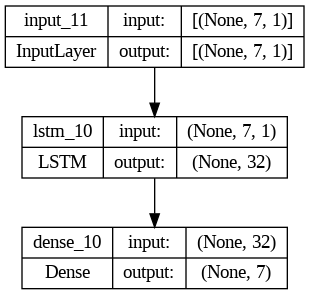

In [101]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import LSTM  

model=Sequential()

model.add(Input(shape=(7,1)))

model.add(LSTM(32,activation="relu"))

model.add(Dense(7))

model.compile(loss="mean_squared_error",optimizer="adam")

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20, batch_size=32,verbose=1)
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
"""
!pip3 install keras-visualizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
import datetime

# create model
model = Sequential()
model.add(LSTM(10, input_shape=(7, 1)))
model.add(Dense(7, activation='softmax'))

# create log directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.create_file_writer(log_dir)

# save model summary
with file_writer.as_default():
  tf.summary.trace_on(graph=True, profiler=True)
  tf.summary.trace_export(name="model_trace", step=0, profiler_outdir=log_dir)

# start TensorBoard server
# navigate to http://localhost:6006/ in your web browser
!tensorboard --logdir logs/fit --bind_all"""

2023-02-20 13:12:56.424848: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-20 13:12:56.424990: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-20 13:12:56.425010: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-02-20 13:12:58.407244: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to c

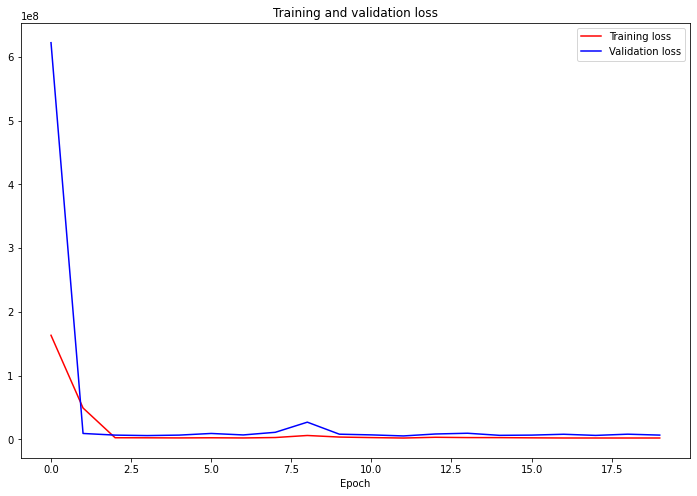

<Figure size 432x288 with 0 Axes>

In [102]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.figure()


plt.show()

In [103]:
prediction = model.predict(X_test)
prediction.shape

10/10 [==============================] - 0s 3ms/step


(302, 7)

dates_test only referres to the current/true value... so `y[10]` must be `dates_test[10]`

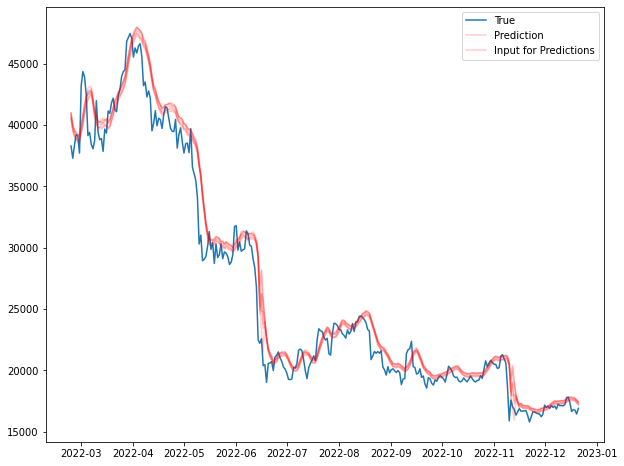

In [104]:
plt.figure(figsize=(10,8))
#plt.plot(dates_test, [y[0] for y in y_test], color='b')
plt.plot(dates_test, [x[6] for x in X_test])#, color='orange')
#plt.plot(dates_test, [y[1] for y in y_test])
#plt.plot(dates_test, [y[2] for y in y_test])
#plt.plot(dates_test, [y[3] for y in y_test])
plt.plot(dates_test, [p[0] for p in prediction], color='r', alpha=0.2)
plt.plot(dates_test, [p[1] for p in prediction], color='r', alpha=0.2)
plt.plot(dates_test, [p[2] for p in prediction], color='r', alpha=0.2)
plt.plot(dates_test, [p[3] for p in prediction], color='r', alpha=0.2)
plt.plot(dates_test, [p[4] for p in prediction], color='r', alpha=0.2)
plt.plot(dates_test, [p[5] for p in prediction], color='r', alpha=0.2)
plt.plot(dates_test, [p[6] for p in prediction], color='r', alpha=0.2)
#plt.plot(dates_test[-8:-1], X_test[-1], color='g')
plt.legend(['True', 'Prediction', 'Input for Predictions'])

In [64]:
full_df = pd.read_csv(path + 'BTC-USD (1).csv')
full_df.index = pd.to_datetime(full_df.pop('Date'))
full_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-01-29,23031.449219,23919.890625,22985.070313,23774.566406,23774.566406,27423687259
2023-01-30,23774.648438,23789.347656,22657.582031,22840.138672,22840.138672,27205595568
2023-01-31,22840.796875,23225.021484,22765.568359,23139.283203,23139.283203,22837828665


1/1 [==============================] - 0s 32ms/step


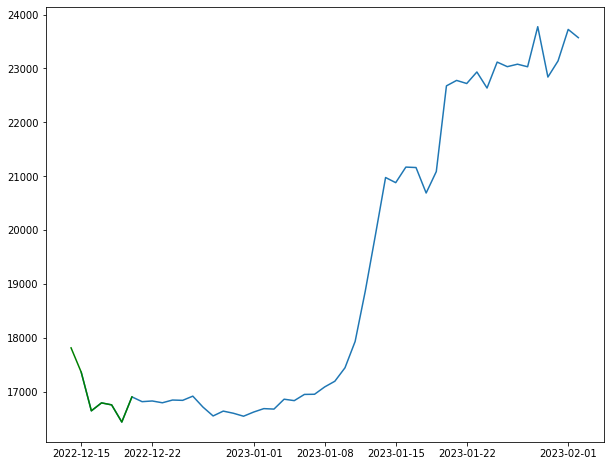

In [65]:
prediction = model.predict(X_test[-1].reshape(1,7,1))
plt.figure(figsize=(10,8))
#plt.plot(dates_test, [y[0] for y in y_test])
#plt.plot(dates_test[], prediction)
plt.plot(full_df.index[-50:], full_df['Close'][-50:])
plt.plot(dates_test[-8:-1], X_test[-1], color='g')
#plt.plot()


In [14]:
print(full_df.index[-1]-dates_test[-1])
dates_pred = full_df.index[-45:]
len(dates_pred)

43 days 00:00:00


45

1/1 [==============================] - 0s 28ms/step


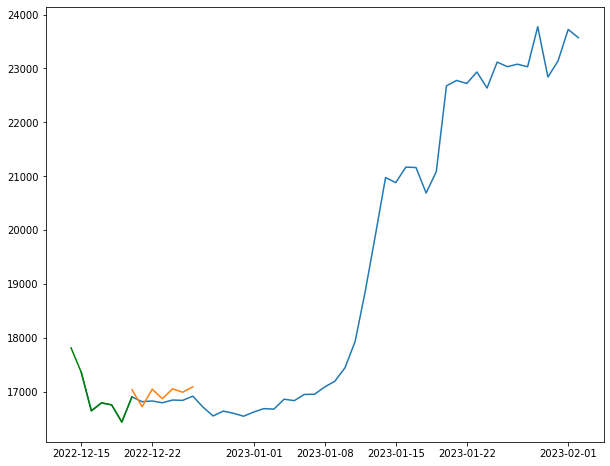

In [66]:
prediction = model.predict(X_test[-1].reshape(1,7,1))
plt.figure(figsize=(10,8))
#plt.plot(dates_test, [y[0] for y in y_test])
#plt.plot(dates_test[], prediction)
plt.plot(full_df.index[-50:], full_df['Close'][-50:])
plt.plot(dates_test[-8:-1], X_test[-1], color='g')
plt.plot(dates_pred[:7], prediction.flatten())

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(full_df['Close'][-50:-43], prediction.flatten())
mae = mean_absolute_error(full_df['Close'][-50:-43], prediction.flatten())
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)

print(mse, mae, rmse)

MSE:  93220.9071461785
MAE:  249.74302430357108
RMSE:  305.32099034651793
93220.9071461785 249.74302430357108 305.32099034651793


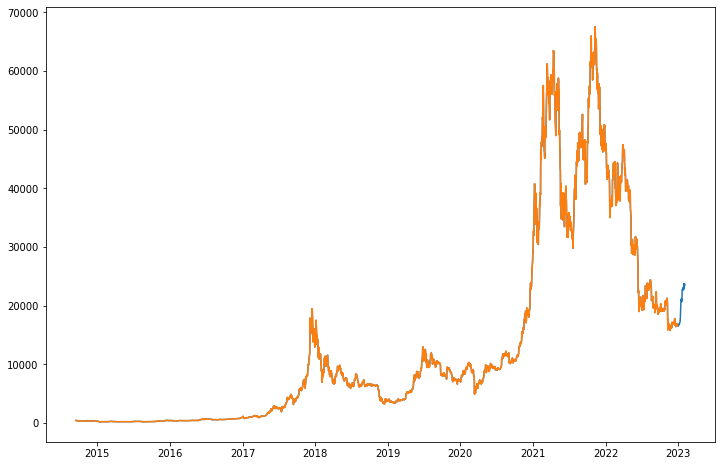

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(full_df.index, full_df.Close)
plt.plot(df.index, df.Close)

In [ ]:
model.summary()
model.predict(X_test[-1].reshape(1,7,1))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 32)                4352      
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 4,583
Trainable params: 4,583
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 20ms/step


array([[16707.963, 17198.344, 17010.691, 16913.455, 16744.64 , 16783.816,
        17048.885]], dtype=float32)

In [105]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.array(range(0,31)) 
last_window = deepcopy(X_test[-1])#.flatten()

for target_date in recursive_dates:
  next_prediction = model.predict(np.array([last_window]), verbose=0).flatten()
  recursive_predictions.append(next_prediction)
  last_window[0] = next_prediction[0]
  last_window[1] = next_prediction[1]
  last_window[2] = next_prediction[2]
  last_window[3] = next_prediction[3]
  last_window[4] = next_prediction[4]
  last_window[5] = next_prediction[5]
  last_window[6] = next_prediction[6]

In [ ]:
np.array(recursive_predictions)

In [70]:
import datetime

start = datetime.datetime(2022, 12, 21)
end = datetime.datetime(2023, 1, 20)

delta = end - start

dates_predictions = pd.to_datetime([start + datetime.timedelta(days=i) for i in range(delta.days + 1)])

print(dates_predictions[1], len(recursive_predictions))
dates_test[-1]

2022-12-22 00:00:00 31


Timestamp('2022-12-21 00:00:00')

Text(0.5, 1.0, '30 Days Recursive Prediction')

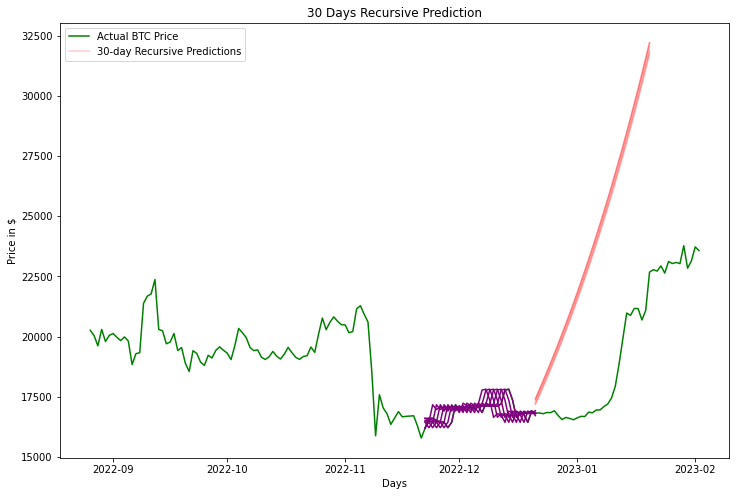

In [106]:
full_BTC = pd.read_csv(path + 'BTC-USD (1).csv')
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(full_BTC['Date'])[2900:], full_BTC['Close'][2900:], color='g')
plt.plot(dates_predictions, recursive_predictions, color='r', alpha=0.2)
plt.plot(dates_test[-30:], y_test[-30:].reshape(30,7), color='purple')
plt.legend(['Actual BTC Price', '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction')

Text(0.5, 1.0, '30 Days Recursive Prediction')

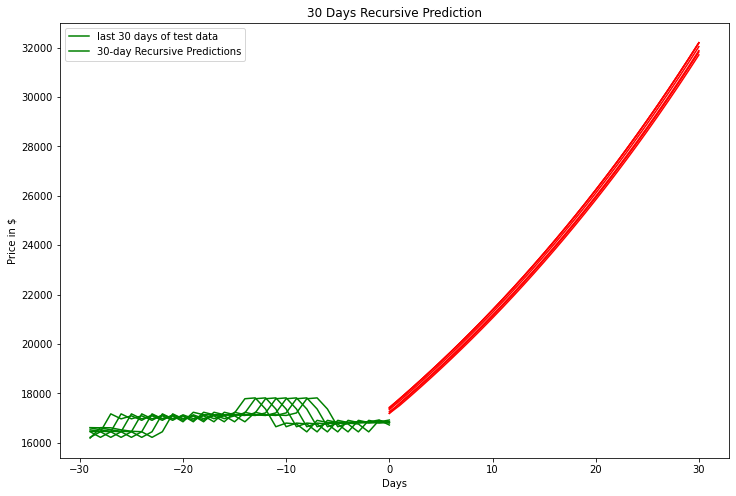

In [107]:
plt.figure(figsize=(12,8))
plt.plot(range(-29, 1, 1), y_test[-30:].reshape(30,7), color='g')
plt.plot(recursive_dates, recursive_predictions, color='r')
plt.legend(['last 30 days of test data', 
             '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction')

### 30 Day Prediction (4 weeks, only 30 days selected for evaluation)

In [133]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.array(range(0,5)) 
last_window = deepcopy(X_test[-1])#.flatten()

for target_date in recursive_dates:
  next_prediction = model.predict(np.array([last_window]), verbose=0).flatten()
  recursive_predictions.append(next_prediction)
  last_window[0] = next_prediction[0]
  last_window[1] = next_prediction[1]
  last_window[2] = next_prediction[2]
  last_window[3] = next_prediction[3]
  last_window[4] = next_prediction[4]
  last_window[5] = next_prediction[5]
  last_window[6] = next_prediction[6]

In [121]:
import datetime

start = datetime.datetime(2022, 12, 21)
end = datetime.datetime(2023, 1, 24)

delta = end - start

dates_predictions = pd.to_datetime([start + datetime.timedelta(days=i) for i in range(delta.days + 1)])

print(dates_predictions[1], len(recursive_predictions))
dates_test[-1]

2022-12-22 00:00:00 5


Timestamp('2022-12-21 00:00:00')

In [112]:
recursive_predictions = recursive_predictions * 0.98

[array([17256.758, 17188.469, 17192.125, 17432.371, 17339.094, 17408.88 ,
        17391.123], dtype=float32),
 array([17573.934, 17508.623, 17600.643, 17777.557, 17692.268, 17776.447,
        17777.96 ], dtype=float32),
 array([17935.451, 17869.7  , 17968.06 , 18144.06 , 18058.32 , 18144.773,
        18147.611], dtype=float32),
 array([18306.643, 18239.576, 18340.174, 18519.613, 18432.154, 18520.42 ,
        18523.37 ], dtype=float32)]

Text(0.5, 1.0, '30 Days Recursive Prediction')

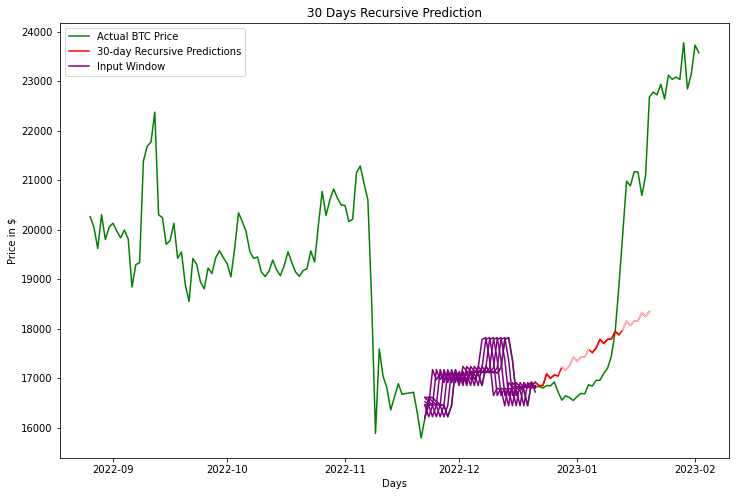

In [138]:
full_BTC = pd.read_csv(path + 'BTC-USD (1).csv')
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(full_BTC['Date'])[2900:], full_BTC['Close'][2900:], color='g')
recursive_predictions = np.array(recursive_predictions).flatten()                                                                                           
plt.plot(dates_predictions[:-4], recursive_predictions[:-4], color='r')
plt.plot(dates_test[-30:], y_test[-30:].reshape(30,7), color='purple')
plt.plot(dates_predictions[0:7], recursive_predictions[:7], color='r')
plt.plot(dates_predictions[7:15], recursive_predictions[7:15], color='pink')
plt.plot(dates_predictions[15:23], recursive_predictions[15:23], color='r')
plt.plot(dates_predictions[23:31], recursive_predictions[23:31], color='pink')
plt.legend(['Actual BTC Price', '30-day Recursive Predictions','Input Window'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction')

Text(0.5, 1.0, '30 Days Recursive Prediction')

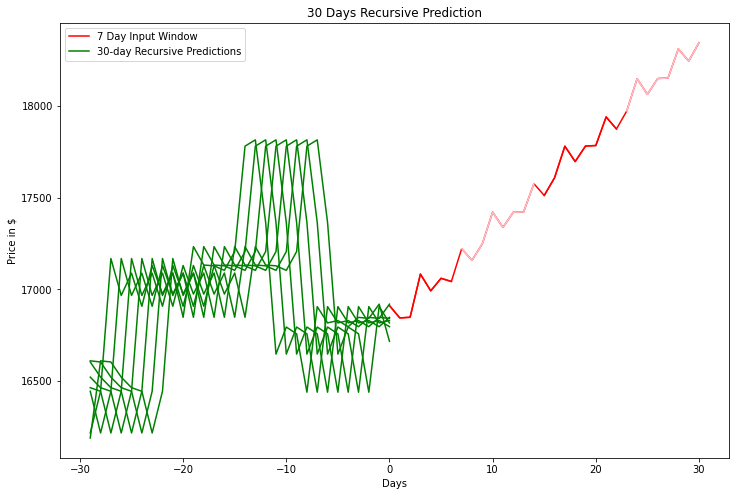

In [140]:
plt.figure(figsize=(12,8))
plt.plot(range(0,31), recursive_predictions[:-4], color='r')
plt.plot(range(-29, 1, 1), y_test[-30:].reshape(30,7), color='g')
plt.plot(range(0,7), recursive_predictions[:7], color='r')
plt.plot(range(7,15), recursive_predictions[7:15], color='pink')
plt.plot(range(15,23), recursive_predictions[15:23], color='r')
plt.plot(range(23,31), recursive_predictions[23:31], color='pink')
plt.legend(['7 Day Input Window', 
             '30-day Recursive Predictions'])
plt.xlabel('Days'); plt.ylabel('Price in $')
plt.title('30 Days Recursive Prediction')

In [148]:
l = len(y_test)+len(y_val)+len(y_train)
comp = full_BTC['Close'][l:]
diff = len(comp)-len(recursive_predictions)
print(diff)
len(full_BTC['Close'][l:])-len(recursive_predictions)

15


15

In [149]:
l = len(y_test)+len(y_val)+len(y_train)
l

3011

In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(full_BTC['Close'][l:-diff], recursive_predictions)
mae = mean_absolute_error(full_BTC['Close'][l:-diff], recursive_predictions)
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print(mse, mae, rmse)

MSE:  1438262.4246670892
MAE:  954.6080914607143
RMSE:  1199.2757917456222
1438262.4246670892 954.6080914607143 1199.2757917456222


In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.array(range(1,31)) 
last_window = deepcopy(X_test[-1]).flatten()

for target_date in recursive_dates:
  next_prediction = model.predict(np.array([last_window]), verbose=0).flatten()
  recursive_predictions.append(next_prediction)
  last_window[0] = last_window[1]
  last_window[1] = last_window[2]
  last_window[2] = last_window[3]
  last_window[3] = last_window[4]  
  last_window[4] = last_window[5]
  last_window[5] = last_window[6]
  last_window[6] = next_prediction[0]

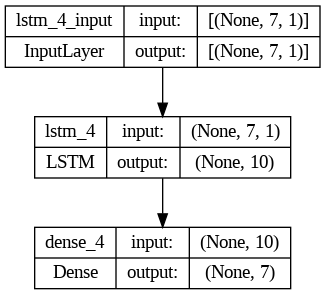

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import plot_model

model = Sequential()
model.add(LSTM(10, input_shape=(7,1)))
model.add(Dense(7, activation='softmax'))

plot_model(model, to_file='model.png', show_shapes=True)